<img src="https://drive.google.com/uc?export=view&id=1nMaBQ7g88duMECw_B4mH8ruxwnIwVzGP" width=300/> 

# ML-1: Exploratory Data Analysis, Visualisation & Modeling
## Homework 2: Who is the best singer ever?

**ML-1 Cohort 1** <br>
**Instructor: Dr. Rahul Dave**<br>
**Max Score: 100** <br>

Abhijeet Dubey, Nagpriya M

## Table of Contents 
* [HW-2: Who is the best singer ever?](#HW-1:-Who-is-the-best-singer-ever?)
  * [Instructions](##Instructions)
  * [Learning Goals](##Learning-Goals)
  * [Loading in DataFrames](##Loading-in-DataFrames)
  * [Q1: Exploratory Data Analysis (EDA)](##Q1:-Exploratory-Data-Analysis-(EDA))
    * [1.1 What has been the trajectory of various genres in the popular zeitgeist?](###1.1-What-has-been-the-trajectory-of-various-genres-in-the-popular-zeitgeist?)
      * [1.1.1 What are the 30 most popular genres?](####1.1.1-What-are-the-30-most-popular-genres?)
      * [1.1.2 How has the popularity of these 30 genres changed with time?](####1.1.2-How-has-the-popularity-of-these-30-genres-changed-with-time?)
    * [1.2 Who are the highest quality singers?](##1.2-Who-are-the-highest-quality-singers?)
      * [1.2.1 Who are the most occurring artists in Billboard's Top 100 list?](###1.2.1-Who-are-the-most-occurring-artists-in-Billboard's-Top-100-list?)
      * [1.2.2 What if we used a different metric?](###1.2.2-What-if-we-used-a-different-metric?)
      * [1.2.3 What is the age at which singers achieve their top ranking?](###1.2.3-What-is-the-age-at-which-singers-achieve-their-top-ranking?)
      * [1.2.4 At what year since inception do bands reach their top rankings?](###1.2.4-At-what-year-since-inception-do-bands-reach-their-top-rankings?)
  * [Q2: Billboard Magazine: Year-end results from weekly results](##Q2:-Billboard-Magazine:-Year-end-results-from-weekly-results)
    * [2.1 Scrape the Billboard Year-End and Weekly Top 100 singles pages for 2020](###2.1-Scrape-the-Billboard-Year-End-and-Weekly-Top-100-singles-pages-for-2020)
      * [2.1.1 Request the Billboard Year-End page for 2020](###2.1.1-Request-the-Billboard-Year-End-page-for-2020)
      * [2.1.2 Request the Billboard Weekly pages for 2020](###2.1.2-Request-the-Billboard-Weekly-pages-for-2020)
    * [2.2 Parsing and Pre-Processing](###2.2-Parsing-and-Pre-Processing)
      * [2.2.1 Parsing the HTML text](####2.2.1-Parsing-the-HTML-text)
      * [2.2.2 Pre-Processing: Songs and their rankings](####2.2.2-Pre-Processing:-Songs-and-their-rankings)
      * [2.2.3 Pre-Processing: Songs and the weeks they ranked in](####2.2.3-Pre-Processing:-Songs-and-the-weeks-they-ranked-in)
      * [2.2.4 Pre-Processing: Songs and their rankings as seen throughout the year](####2.2.4-Pre-Processing:-Songs-and-their-rankings-as-seen-throughout-the-year)
    * [2.3 How do year-end Top 100 songs do throughout the year in all weeks?](###2.3-How-do-year-end-Top-100-songs-do-throughout-the-year-in-all-weeks?)
      * [2.3.1 Creating the dataframe](####2.3.1-Creating-the-dataframe)
      * [2.3.2 Plot the mean rank against the final, year-end rank](####2.3.2-Plot-the-mean-rank-against-the-final,-year-end-rank)
    * [2.4 What features may be used to distinguish "winners" from "losers"?](###2.4-What-features-may-be-used-to-distinguish-"winners"-from-"losers"?)
      * [2.4.1 Creating the dataframe](####2.4.1-Creating-the-dataframe)
      * [2.4.2 Make a scatterplot matrix of these features, color coded by winners/losers](####2.4.2-Make-a-scatterplot-matrix-of-these-features,-color-coded-by-winners/losers)


## Instructions

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To work on the homework, you will first need to fork the repository into your GitHub account and clone it to work on it on your local computer. To submit your homework, push your homework into the same GitHub and upload the link on edStem.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropriate plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

## Learning Goals

Billboard Magazine puts out a top 100 list of "singles" every year.
In the previous homework, you scraped and created a dataframe with columns year, songs, ranking, artists, genres, etc. from this data.

This homework consists of two main parts. <br>In the first part of this homework, you will be performing Exploratory Data Analysis on the same dataframe you created last homework. 

Billboard Magazine also puts out a top 100 list of "singles" every **week**.

In the second part of this homework, you will have to scrape Billboard's weekly top 100 list to try to understand how the public's taste in music has evolved. You will do this by learning about the best singers and groups from each year as determined by the Billboard top 100 charts.

The homework will help develop your skills in:

- Simple Exploratory Data Analysis
- Thinking about data and what features might be used to make predictions

---

In [4]:
#Import libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as pltimport 
import pandas as pd
import time
import json
import pickle
from bs4 import BeautifulSoup
import requests
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import warnings
warnings.filterwarnings("ignore")

Continuing from the previous homework, we have one dataframe `flatframe` for the songs, and one merged dataframe which has the songs with artist info in each row for each song we called `largedf`.

To begin with this homework, load in your json files from the previous homework and create the dataframes.

## Loading in DataFrames

Load in the dataframes `flatframe` and `largedf` you saved from last homework.

In [6]:
flatframe = pd.read_pickle('flatframedf')
flatframe.head()

,year,band_singer,url,song,songurl,ranking
0,1992,Boyz II Men,/wiki/Boyz_II_Men,End of the Road (Boyz II Men song),/wiki/End_of_the_Road_(Boyz_II_Men_song),1
1,1993,Whitney Houston,/wiki/Whitney_Houston,I Will Always Love You,/wiki/I_Will_Always_Love_You#Whitney_Houston_v...,1
2,1994,Ace of Base,/wiki/Ace_of_Base,The Sign (song),/wiki/The_Sign_(song),1
3,1995,Coolio,/wiki/Coolio,Gangsta's Paradise,/wiki/Gangsta%27s_Paradise,1
4,1995,L.V. (singer),/wiki/L.V._(singer),Gangsta's Paradise,/wiki/Gangsta%27s_Paradise,1


In [7]:
largedf = pd.read_pickle('largedf')
largedf.head()

,year,band_singer,url,song,songurl,ranking,genres,born,ya,#Musical_style,/w/index.php?title=Soul_rock_(music)&action=edit&redlink=1,/wiki/Acid_jazz,/wiki/Acid_rock,/wiki/Acoustic_music,/wiki/Acoustic_rock,/wiki/Adult_contemporary,/wiki/Afrobeats,/wiki/Alternative_R%26B,/wiki/Alternative_Rock,/wiki/Alternative_country,/wiki/Alternative_dance,/wiki/Alternative_folk,/wiki/Alternative_hip_hop,/wiki/Alternative_metal,/wiki/Alternative_music,/wiki/Alternative_pop,/wiki/Ambient_music,/wiki/Americana_(music),/wiki/Anarcho-punk,/wiki/Anti-folk,/wiki/Arena_rock,/wiki/Art_pop,/wiki/Art_rock,/wiki/Atlantic_Records,/wiki/Avant-funk,/wiki/Avant-garde_music,/wiki/Avant-pop,/wiki/Bachata_(music),/wiki/Baroque_pop,/wiki/Bass_music,/wiki/Bedroom_pop,/wiki/Bhangra_(music),/wiki/Big_room_house,/wiki/Blue-eyed_soul,/wiki/Bluegrass_music,/wiki/Blues_music,/wiki/Blues_rock,/wiki/Breakbeat,/wiki/British_hip_hop,/wiki/British_soul,...,/wiki/Snap_music,/wiki/Soca_music,/wiki/Soft_rock,/wiki/Sophisti-pop,/wiki/Soul_music,/wiki/SoundCloud_rap,/wiki/Southern_hip_hop,/wiki/Southern_rap,/wiki/Southern_rock,/wiki/Southern_soul,/wiki/Space_rock,/wiki/Speed_metal,/wiki/Spoken_word,/wiki/Surf_music,/wiki/Swing_music,/wiki/Synth-pop,/wiki/Synth-rock,/wiki/Synthpop,/wiki/Synthwave_(2000s_genre),/wiki/Tech_house,/wiki/Techno,/wiki/Teen_pop,/wiki/Thrash_metal,/wiki/Traditional_pop_music,/wiki/Trance_music,/wiki/Trap_music,/wiki/Trap_music_(EDM),/wiki/Trap_music_(hip_hop),/wiki/Trip_hop,/wiki/Trop_rock,/wiki/Tropical_house,/wiki/Tropical_music,/wiki/UK_bass,/wiki/UK_funky,/wiki/UK_garage,/wiki/Underground_hip_hop,/wiki/Urban_adult_contemporary,/wiki/Urban_contemporary,/wiki/Urban_contemporary_gospel,/wiki/Urban_pop,/wiki/Urbano_music,/wiki/Video_game,/wiki/Vlog,/wiki/Wagnerian_rock,/wiki/West_coast_hip_hop,/wiki/Western_swing,/wiki/World_music,/wiki/Worldbeat,/wiki/Worship_music,NA
0,1992,Boyz II Men,/wiki/Boyz_II_Men,End of the Road (Boyz II Men song),/wiki/End_of_the_Road_(Boyz_II_Men_song),1,"['/wiki/Contemporary_R%26B_music', '/wiki/Soul...",<NA>,1987–present,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1996,Boyz II Men,/wiki/Boyz_II_Men,One Sweet Day,/wiki/One_Sweet_Day,2,"['/wiki/Contemporary_R%26B_music', '/wiki/Soul...",<NA>,1987–present,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1994,Boyz II Men,/wiki/Boyz_II_Men,I'll Make Love to You,/wiki/I%27ll_Make_Love_to_You,3,"['/wiki/Contemporary_R%26B_music', '/wiki/Soul...",<NA>,1987–present,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1995,Boyz II Men,/wiki/Boyz_II_Men,On Bended Knee,/wiki/On_Bended_Knee,5,"['/wiki/Contemporary_R%26B_music', '/wiki/Soul...",<NA>,1987–present,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1993,Boyz II Men,/wiki/Boyz_II_Men,In the Still of the Night (1956 song),/wiki/In_the_Still_of_the_Night_(1956_song)#Bo...,12,"['/wiki/Contemporary_R%26B_music', '/wiki/Soul...",<NA>,1987–present,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Q1: Exploratory Data Analysis (EDA)

[40 points]

Your visualizations should be an attempt to answer the following four questions.

### 1.1 What has been the trajectory of various genres in the popular zeitgeist?
[20 points]

####1.1.1 What are the 30 most popular genres?

Before understanding the trajectory of various genres, let us first see what are the 30 most recurring genres in the Billboard Top 100 singles.
Find the top 30 genres and plot a histogram of these genres.<br>
Feel free to plot any other visualizations that you can think of!

In [8]:
#taking the genres columns from the largedf
genres_cols=largedf.columns[11:-1]
#storing the genres and number of reccuring times as a dictionary
genres_dict={i:largedf[i].sum() for i in genres_cols}

In [9]:
def take_second(elem):
    return elem[1]
# sorting the list and storing it as a list of tuples
genres_dict_30=[(i.replace('/wiki/',''),j) for i,j in sorted(genres_dict.items(), key= take_second, reverse=True)][:30]

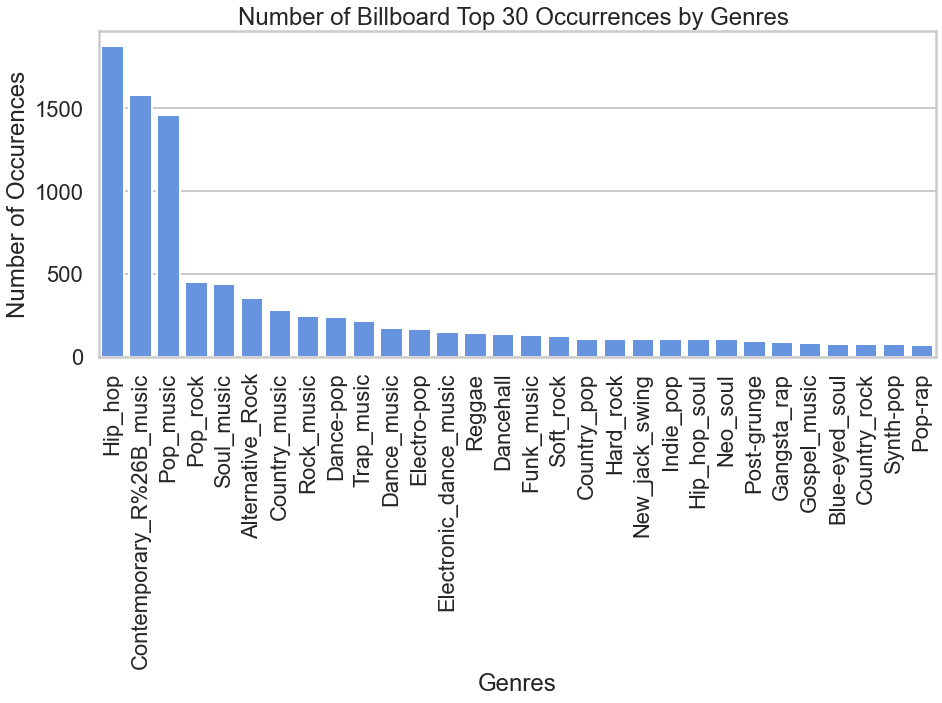

In [10]:
# plotting
f = plt.figure(figsize = (15,6), frameon = False)
sns.barplot([i for i,j in genres_dict_30], [j for i,j in genres_dict_30], color = '#528ff2')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Occurences');
plt.title("Number of Billboard Top 30 Occurrences by Genres ");

#### 1.1.2 How has the popularity of these 30 genres changed with time?

Now that we have the top 30 genres, we can understand the trajectory of these various genres with time.

**Hint:**<br>
To do this, create a subframe of the ranking and year for each genre.<br>
Use the the groupby() function to group by year. <br>
This will give you a dataframe that contains the rankings of every song from that genre in a given year. 

Next, create a dictionary `genreinfo` keyed by genre, whose value is a tuple of 3 Pandas series: 
- the mean of the rankings per year for that genre, 
- the standard deviation on those rankings per year for that genre,
- the series groupby object for the rankings per year created from before

Here is an example of what one dictionary for one particular genre should look like.
This is the output of `genreinfo['/wiki/Hip_Hop']`
```
{'meanseries': year
 1992    45.222222
 1993    41.843750
 1994    48.400000
 ..
 2019    49.617284
 2020    50.152941
 'rankingseries': <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f546e294a90>,
 'stdseries': year
 1992    28.544612
 1993    26.908578
 1994    28.230355
 ....
 2019    27.151689
 2020    28.295846}
 ```

In [11]:
#your code here
groupby_year = largedf.groupby(['year'])
genreinfo = {}
year_list = np.sort(largedf['year'].unique())

for genre in genres_dict_30:
  genre = '/wiki/'+genre[0]
  list_of_mean = []  
  list_of_std = []


  for year in year_list:
    df_year = groupby_year.get_group(year)
    mean = df_year[df_year[genre]==1]['ranking'].mean()
    std = df_year[df_year[genre]==1]['ranking'].std()     
    list_of_mean.append(mean)
    list_of_std.append(std)
                        
  series = pd.Series(list_of_mean, index = year_list, name ='meanseries')
  series2 = pd.Series(list_of_std, index = year_list, name ='stdseries')
  genreinfo[genre] = (series,series2,largedf[largedf[genre]==1].groupby(['year'])['ranking'])

Make a 10 row, 3 column small multiples plot of the 30 most popular genres.

Use the dictionary `genreinfo` created in the previous section to make a plot of how the "ranking of a genre" has changed with time. <br>
To do this, the mean rank achieved by songs in a genre per year forms the backbone of this plot, with the standard deviation shown.

(Since a song belongs to many genres through the artist, this means that a song may be represented in multiple plots. Again, while not strictly true, this is a simplifying assumption we are making.)

Here is an example plot:

![SmallMultiplesExample](https://drive.google.com/uc?export=view&id=1YycsQqp7EKD_qj2V40pb8xviSa4beTQC)

Some instructions for the plot:

1. The blue scatters are all the songs "in" that genre: keep them at a low alpha so one can visually see the density. 
2. The dark red points are the means. You can choose to join them if you like.
3. The light red band uses matplotlib's `fill_between` to fill the area between `mean-std` and `mean+std`. 
4. If the standard deviation is NaN, fill up the entire y dimension with it to give a notion of large impreciseness in the measure.


Try out different visualizations. If you have a better viz for this, by all means go for it!

Use matplotlib object oriented programming!

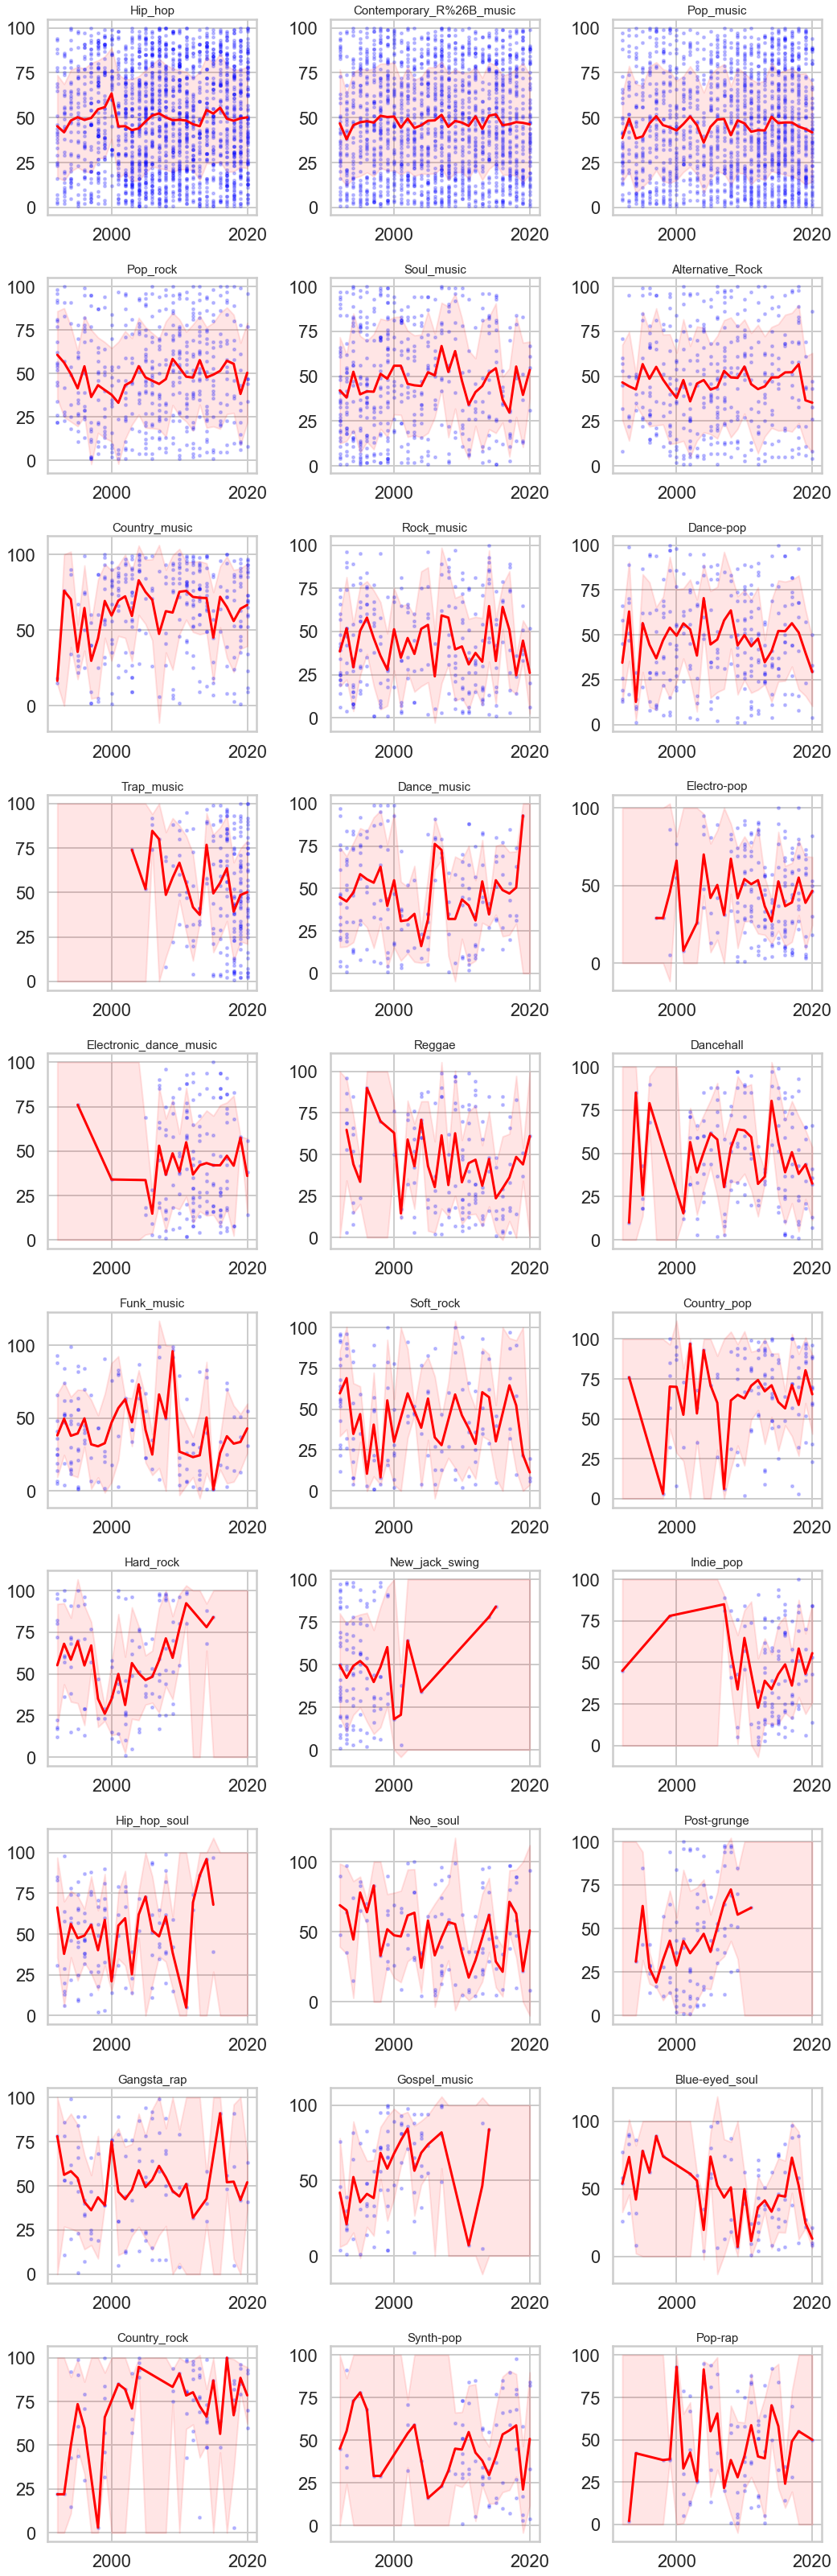

In [12]:
fig, ax= plt.subplots(10,3,figsize=(15,45))
ax=ax.flatten()
for ax1,genre1 in zip(ax,genres_dict_30):
  genre ='/wiki/'+genre1[0]
  bol=~genreinfo[genre][0].isna()
  ax1.plot(genreinfo[genre][0].index[bol],genreinfo[genre][0][bol],color='r')
  mean_p_std=genreinfo[genre][0]+genreinfo[genre][1]
  mean_p_std[mean_p_std.isna()]=100
  mean_m_std=genreinfo[genre][0]-genreinfo[genre][1]
  mean_m_std[mean_m_std.isna()]=0
  ax1.fill_between(year_list,mean_m_std,mean_p_std,color = 'r',alpha=0.1)
  for year in [i for i,j in genreinfo[genre][2]]:
    y=genreinfo[genre][2].get_group(year)
    ax1.scatter([year]*len(y),y,alpha=0.2,color='b', s=10)
  ax1.set_title(genre1[0],size=15)
plt.tight_layout()

**What trends do you see?**

Write a paragraph, touching on which genres are the most popular, and how this popularity has changed over time.

Genres like hip-hop, contemporary and pop-music are always in top and there is no much fluctuations in the graph. There are more music from these genres and the ranks of them are spread across 1-100. Other genres which rarely make a position are not so much popular hence the curves have more ups and downs.

### 1.2 Who are the highest quality singers?
[20 points]

#### 1.2.1 Who are the most occurring artists in Billboard's Top 100 list?

One way to answer this question is by counting the number of times a singer appears in the top 100 over a certain time period. Consider an artist appearing twice in a year as two appearances. 

Plot a bar chart of the artists who have occurred at least more than 15 times in the given time frame.

In [13]:
sum_ranking = flatframe.groupby('band_singer').size().reset_index(name='counts')
top_artists = sum_ranking.sort_values(by='counts', ascending=False)
top_art_15=top_artists[top_artists['counts']>=15]

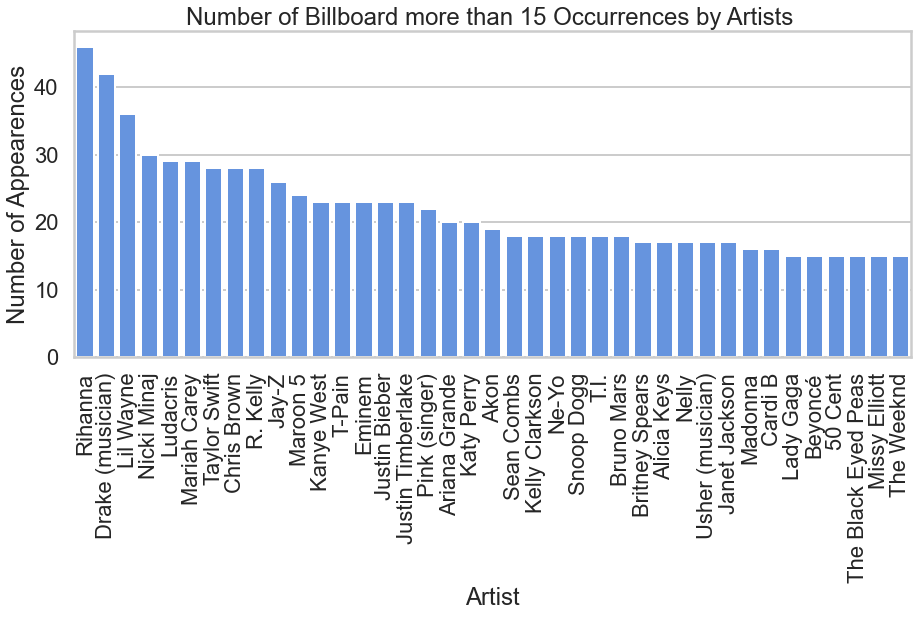

In [14]:
f = plt.figure(figsize = (15,6), frameon = False)
sns.barplot(top_art_15.band_singer, top_art_15.counts, color = '#528ff2')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Number of Appearences');
plt.title("Number of Billboard more than 15 Occurrences by Artists ");

#### 1.2.2 What if we used a different metric?

A singer should be scored higher if he or she appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking. 

Think of a metric to do the above and plot another bar chart to determine the 'highest quality' singer.

In [65]:
#Create a metric 
# metric based on mean rankings for artists who appeared more than 15 times in the billboard
mean_rank=flatframe.groupby(['band_singer']).mean()['ranking']
rank_mean=[]
for artist in top_art_15['band_singer']:
  if artist in list(mean_rank.index):
    rank_mean.append(mean_rank[artist])
top_art_15['mean_rank']=rank_mean
top_art_15 = top_art_15.sort_values(by='mean_rank')

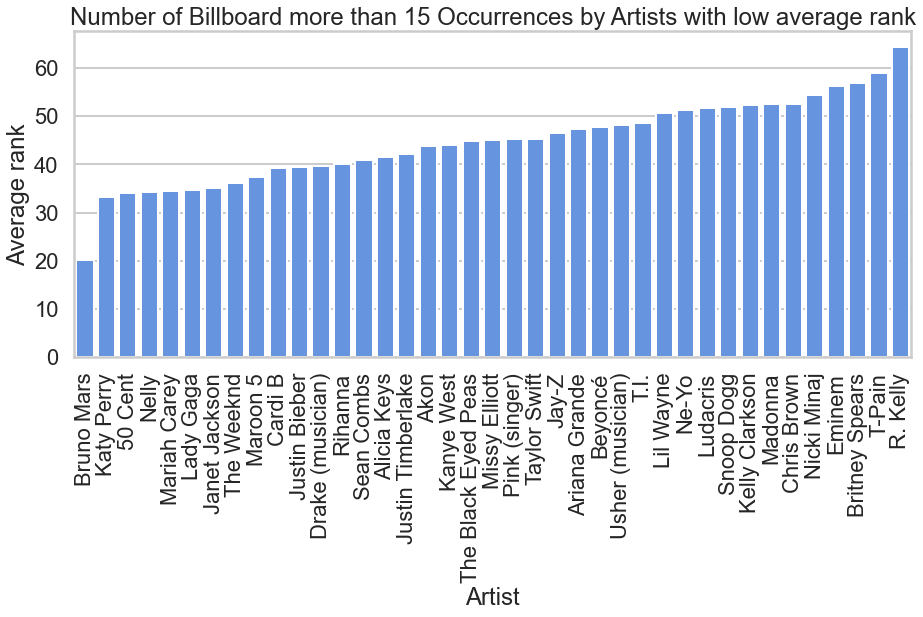

In [66]:
# plotting
f = plt.figure(figsize = (15,6), frameon = False)
sns.barplot(top_art_15.band_singer, top_art_15.mean_rank, color = '#528ff2')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Average rank');
plt.title("Number of Billboard more than 15 Occurrences by Artists with low average rank");

**Do you notice any major differences when you change the metric?**

How have the singers at the top shifted places? Why do you think this is so?

Yes, there has been major changes occurred while changing the metric. Top artists based on number of occurances went back on 15 places based on new metric. This might be because artist who come in billboard top singles repeatedly, does not get a much better rank


#### 1.2.3 What is the age at which singers achieve their top ranking?

Plot a histogram of the age at which artists reach their top ranking.

In [17]:
# filtering out nans
singers = largedf[largedf.born != '<NA>']

In [18]:
# creating born_year column
singers = singers.drop_duplicates(subset = 'band_singer')
singers['born_year'] = pd.DatetimeIndex(singers['born']).year
singers.year = singers.year.astype(int)
#Calculate their ages as a dataseries
singers['age_ranked_year'] = singers.year-singers.born_year
# creating a dataframe with age and number of times they reached top ranking
singers_ageranking = singers.groupby('age_ranked_year').size().reset_index(name='counts')
singers_ageranking_sorted = singers_ageranking.sort_values(by='counts', ascending=False)
singers_ageranking_sorted.dropna(subset = ["age_ranked_year"], inplace=True)
singers_ageranking_sorted.head()

,age_ranked_year,counts
11,24,60
13,26,59
14,27,57
12,25,53
17,30,50


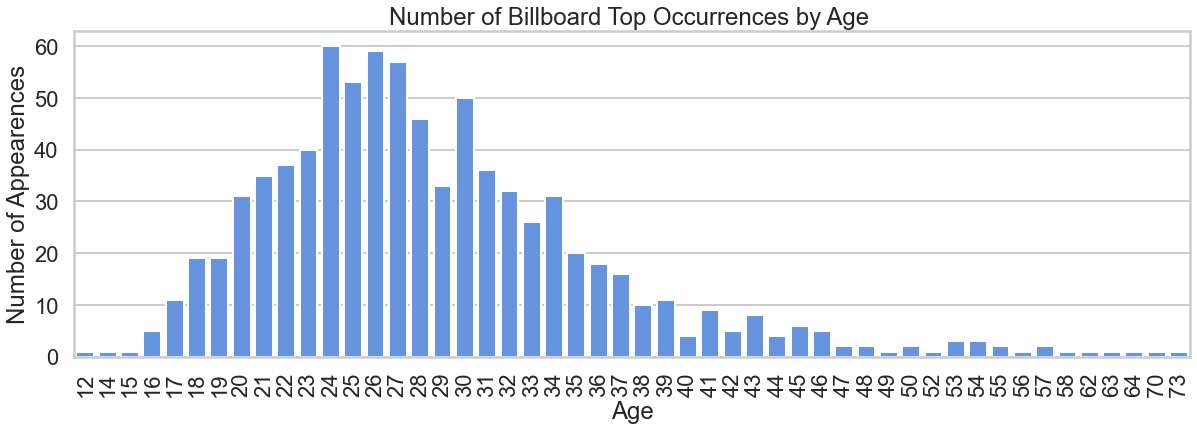

In [19]:
# plotting
f = plt.figure(figsize = (20,6), frameon = False)
sns.barplot(singers_ageranking_sorted.age_ranked_year, singers_ageranking_sorted.counts.values, color = '#528ff2')
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Number of Appearences');
plt.title("Number of Billboard Top Occurrences by Age ");

#### 1.2.4 At what year since inception do bands reach their top rankings?

Make a similar calculation to plot a histogram of the years since inception at which bands reach their top ranking.

In [20]:
# dropping nans
bands = largedf[largedf.ya != '<NA>']

In [21]:
def get_year_inception(years):
    """clean years active to standard format"""
    if type(years) == float:
        return years
    if type(years) == str or type(years) == bs4.element.NavigableString:    
        if years.isdigit():
            return years.split('−')[0].split('–')[0]
        return years.split('−')[0].split('s')[0].split('–')[0]
    if "–" in years[0]:
        return years[0].split("–")[0]
    if "-" in years[0]:
        return years[0].split('-')[0]
    else:
        return years[0].split('−')[0].split('s')[0].split('–')[0]

In [67]:
#handles edge cases for years active format
bands = bands[bands.ya != '']
band_year_inception = bands.ya.apply(get_year_inception)
band_year_inception = band_year_inception.apply(lambda x: float(x) if len(x) != 2 else float("NaN") )
band_year_inception["since_inception"] = bands.year - band_year_inception.values

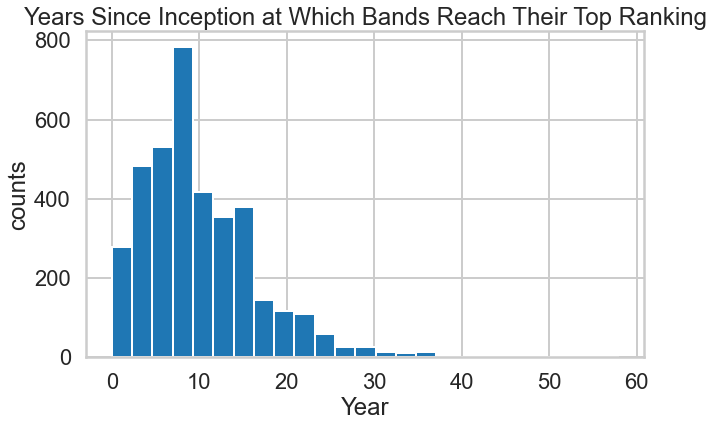

In [68]:
#plotting
# removing negative values (it might have occured for those bands which had more than 1 years active)
plt_prps=band_year_inception["since_inception"][band_year_inception["since_inception"]>=0]
plt.figure(figsize=(10,6))
plt.hist(plt_prps,bins=25)
plt.title("Years Since Inception at Which Bands Reach Their Top Ranking")
plt.xlabel("Year")
plt.ylabel('counts')
plt.show()

**What do you infer from the last two questions?**

More artists were at the age between 24 to 32 while they reached the top ranked position. And most of the bands reached top position at 5 to 10 years from the year of inception.


## Q2: Billboard Magazine: Year-end results from weekly results

[60 points]

The aim of this problem is to find features in the weekly Billboard top 100 that can predict the end year results that you saw in the previous homework. 

In the interests of time (and your brain), we'll only do 2020: a complete study would do all the years.

### 2.1 Scrape the Billboard Year-End and Weekly Top 100 singles pages for 2020

#### 2.1.1 Request the Billboard Year-End page for 2020
Use python's requests module to obtain (GET) the web page at http://www.billboard.com/charts/year-end/2020/hot-100-songs and store its text in a variable named `end_year`.

In [69]:
end_year=requests.get("http://www.billboard.com/charts/year-end/2020/hot-100-songs").text

####2.1.2 Request the Billboard Weekly pages for 2020

Billboard releases its weekly ratings on saturdays. 
Billboard makes the lists for every saturday available at:
`http://www.billboard.com/charts/hot-100/saturday`, for example, http://www.billboard.com/charts/hot-100/2014-12-27.

Therefore, before extracting data from the webpages, we need to first find all the saturdats for a given year. 

We have written a function `allsats(year, fs)` to get all the saturdays in a given year, and given the day part of the date of the first saturday of the year in january.

In [71]:
from datetime import date, timedelta
def allsats(year, fs):
    days=[]
    d = date(year, 1, fs)       
    while d.year == year:
        days.append(d.strftime("%Y-%m-%d"))
        d += timedelta(days = 7)
    return days

The first Saturday in 2020 is Jan 4th:

In [72]:
sats=allsats(2020, 4)
len(sats)

52

Now, we need to scrape the webpage using pythons `request` module. 

Store the text from your requests in a dictionary called `satdict`. This dictionary should have as its keys keys the saturday date strings seen above in the list `sats` , and one additional key, `end_year`. The values corresponding to the keys are the html text downloaded from billboard. The value corresponding to the `end_year` key comes from the `end_year` variable.<br>

So, each entry in `satdict` will look something like this:
![yearstext](https://drive.google.com/uc?export=view&id=1E06_ku91KHCV9kgkmJKEM2t33doeD7Qr)
with an extra `end_year` key-value pair.

In [44]:
satdict = {}
satdict['end_year'] = end_year
for sat in sats:
    time.sleep(10)
    req_sat = requests.get('http://www.billboard.com/charts/hot-100/' + sat)
    page_sat = req_sat.text
    satdict[sat] = page_sat

Save this dictionary as a json file so you do not need to run it over and over again.

In [45]:
#Store the dictionary and delete the variable
with open("satdict.json","w") as fd:
    json.dump(satdict, fd)
del satdict

In [46]:
#Load the dictionary back to the same variable
with open("satdict.json") as fd:
    satdict=json.load(fd)

### 2.2 Parsing and Pre-Processing
[20 points]

#### 2.2.1 Parsing the HTML text

Now that you have the HTML text for both the year-end and weekly results, we can parse the text to extract the information we need. 

To do this, you will need to write 2 functions:

1. A function `get_weekly(weekstring, indict)`.<br>
  * It should take in two parameters: 
    * `weekstring`: the date of the corresponding saturday (For example: '2020-01-04')
    * `indict`: a dictionary with *keys* as the saturdays and *values* as the text of the billboard page for that day.
  *  It should return a **list** of tuples `(ranking, songdict)`where each tuple corresponds to one song in that week's top-100. 
    * `ranking` is the ranking of that song
    * `songdict` is a dictionary. The dictionary `songdict` should look like this: <br>
    `songdict=dict(ranking=ranking, title=title)`
    <br>where `title` is the title of the song and `ranking` is the same as the first element of the tuple.
    <br><br>



2. A function `get_year(weekstring,indict)` which extracts the same information as above for the 2020 year-end results. 
  * It should take in two parameters: 
    * `weekstring`: the `end_year` key, and 
    * `indict`: value from the dictionary `satdict`

In [47]:
"""
Function
--------
get_weekly

Inputs
------
weekstring: the saturday in question
indict: a dictionary with keys being saturdays, and values being the billboard html associated
with those saturdays
   
Returns
-------
A list of tuples. Each tuple has two elements. The first element is the ranking. The
second is a dictionary songdict with keys-
    ranking: ranking of song. same as first element of the tuple
    title: title of song


Notes
-----
See description above.
"""
def get_weekly(weekstring, indict):    
    chartlist = []
    soup = BeautifulSoup(indict[weekstring], 'html.parser')    
    maintag = soup.find_all("ol", "chart-list__elements")
    rows = [row for row in maintag[0].find_all("li")]
    for row in rows[0:]:
        songdict = {}
        span_rank = row.find('span', attrs={'class': 'chart-element__rank__number'})
        span_songtitle = row.find('span', attrs={'class': 'chart-element__information__song'})        
        songdict['ranking'] = span_rank.text.strip()
        songdict['title'] = span_songtitle.text.strip()
        chartlist.append((span_rank.text.strip(), songdict))
    return chartlist

In [48]:
"""
Function
--------
get_year

Inputs
------
weekstring: 'end_year'
indict: the value corresponding to 'end_year' in the dictionary satdict
   
Returns
-------
A list of tuples. Each tuple has two elements. The first element is the ranking. The
second is a dictionary songdict with keys-
    ranking: ranking of song. same as first element of the tuple
    title: title of song


Notes
-----
See description above.
"""
def get_year(weekstring, indict):
    chartlist = []
    songdicttemp = {}
    soup = BeautifulSoup(indict[weekstring], 'html.parser')
    maintag = soup.find_all("div", "chart-details")
    rows = [row for row in maintag[0].find_all("div")]
    for row in rows[0:]:        
        div_rank = row.find('div', attrs={'class': 'ye-chart-item__rank'})
        div_songtitle = row.find('div', attrs={'class': 'ye-chart-item__title'})        
        if div_rank != None and div_songtitle != None:
            songdict = {}
            if(div_songtitle.text.strip() not in songdicttemp):
                songdicttemp[div_songtitle.text.strip()] = "Added"
                songdict['ranking'] = div_rank.text.strip()
                songdict['title'] = div_songtitle.text.strip()
                chartlist.append((div_rank.text.strip(), songdict))
    return chartlist

#### 2.2.2 Pre-Processing: Songs and their rankings

Now, let's process the weekly and year-end information using the functions you just defined. 

Create a list, `weekinfo`, with the above function `get_weekly` run for each week. <br>
Your list `weekinfo` should look something like this:
```
[[('1', {'ranking': '1', 'title': 'All I Want For Christmas Is You'}),
  ('2', {'ranking': '2', 'title': "Rockin' Around The Christmas Tree"}),
  ....
  ('99', {'ranking': '99', 'title': 'Enemies'}),
  ('100', {'ranking': '100', 'title': 'South Of The Border'})],
 [('1', {'ranking': '1', 'title': 'Circles'}),
  ('2', {'ranking': '2', 'title': 'Memories'}),
  ('3', {'ranking': '3', 'title': 'The Box'}),
  ...
  ('99', {'ranking': '99', 'title': 'Slow Dance In A Parking Lot'}),
  ('100', {'ranking': '100', 'title': 'July'})],
 [('1', {'ranking': '1', 'title': 'The Box'}),
  ..
  ('100', {'ranking': '100', 'title': 'WHAT TO DO?'})],
 [...]... and so on]
```
Therefore, weekinfo should be a list with length 52, where the length of each of these 52 elements is 100.
<br><br>
Next, `zip` the `weekinfo` together with the saturdays to create a list of tuples `weektuples`.

In [49]:
weekinfo=[]
for sat in sats:
    weekinfo.append(get_weekly(sat, satdict))

In [50]:
weektuples=zip(sats, weekinfo) 

Also, store the results of running the function `get_year` for the end of year rankings in a variable `yearend`.

In [51]:
yearend=get_year('end_year', satdict)

#### 2.2.3 Pre-Processing: Songs and the weeks they ranked in 

Here, write another function `get_for_title(weektups)`.

* It should take in the tuples created above.
* It should return a dictionary `titles`
  * The *key* should the title of the song
  * The *value* should be a list of tuples: (`weekindex`, `ranking`). 
    * `weekindex` should starts at 1 for the first week of the year and ends at 52 for the last week of the year
    * `ranking` is the ranking achieved that week. 

So the dictionary `titles` should look something like this:
```
{"'Tis The Damn Season": [(52, '39')],
 "(There's No Place Like) Home For The Holidays": [(1, '37'),
  (50, '47'),
  (51, '37'),
  (52, '43')],
 '10,000 Hours': [(1, '17'),
  (2, '9'),
  (3, '5'),
  (4, '7')],
...}
```

In [52]:
"""
Function
--------
get_for_title

Inputs
------
weektups: zip of the weekinfo together with the saturdays dates
   
Returns
-------
titles: A dictionary keyed by title of the song
and with values as a list of tuples (weekindex,ranking) to indicate every ranking for that particular song corresponding to weekindex ranging from 1 to 52

Notes
-----
See description above.
"""

def get_for_title(weektups):    
    titles = {}
    for i, (j, k) in enumerate(weektups):
        for l, m in enumerate(k):
            title = m[1]["title"]
            ranking = m[1]["ranking"]
            if title in titles:
                titles[title] += [(i, ranking)]
            else:
                titles[title] = [(i, ranking)]
    return titles

In [53]:
titles = get_for_title(weektuples)
titles

{'All I Want For Christmas Is You': [(0, '1'),
  (47, '29'),
  (48, '14'),
  (49, '2'),
  (50, '1'),
  (51, '2')],
 "Rockin' Around The Christmas Tree": [(0, '2'),
  (47, '43'),
  (48, '21'),
  (49, '4'),
  (49, '83'),
  (50, '3'),
  (50, '71'),
  (51, '3'),
  (51, '87')],
 'Jingle Bell Rock': [(0, '3'), (48, '31'), (49, '9'), (50, '5'), (51, '4')],
 'A Holly Jolly Christmas': [(0, '4'), (49, '24'), (50, '14'), (51, '6')],
 'Circles': [(0, '5'),
  (1, '1'),
  (2, '3'),
  (3, '3'),
  (4, '4'),
  (4, '48'),
  (5, '3'),
  (6, '3'),
  (7, '3'),
  (8, '3'),
  (9, '3'),
  (10, '4'),
  (11, '5'),
  (12, '5'),
  (13, '5'),
  (14, '4'),
  (15, '6'),
  (16, '7'),
  (17, '6'),
  (18, '8'),
  (19, '8'),
  (20, '10'),
  (21, '10'),
  (22, '11'),
  (23, '11'),
  (24, '11'),
  (25, '13'),
  (26, '10'),
  (27, '13'),
  (28, '13'),
  (29, '20'),
  (30, '18'),
  (31, '20'),
  (32, '16'),
  (33, '15'),
  (34, '16'),
  (35, '16'),
  (36, '15'),
  (37, '16'),
  (38, '16'),
  (39, '17'),
  (40, '17'),
  (41

#### 2.2.4 Pre-Processing: Songs and their rankings as seen throughout the year

Finally, let's create a dictionary `tdict` keyed by the lower-cased title where we store the rank means (`rankmean`), rank standard deviations (`rankstd`) and rank count, the number of times(weeks) it appeared in the rankings in 2020, (`ranklen`), for a song.

Therefore, `tdict` should look something like this:
```
{"'tis the damn season": {'ranks': (39.0, nan, 1)},
 '10,000 hours': {'ranks': (19.31578947368421, 12.614157088934936, 19)},
 '20/20': {'ranks': (94.0, nan, 1)},
 "223's": {'ranks': (86.25, 8.421203397773187, 4)},
 ....}
```

In [54]:
tdict = {}
for title in titles.keys():
  title_l= title.lower()
  ranks=[int(j) for i,j in titles[title]]
  r={}
  if np.std(ranks)==0:
    st=float('NaN')
  else:
    st=np.std(ranks)
  value=(np.mean(ranks),st,len(ranks))
  r['ranks']=value
  tdict[title_l]=r

In [55]:
tdict

{'all i want for christmas is you': {'ranks': (8.166666666666666,
   10.382945418115016,
   6)},
 "rockin' around the christmas tree": {'ranks': (35.22222222222222,
   34.41826962458481,
   9)},
 'jingle bell rock': {'ranks': (10.4, 10.49952379872535, 5)},
 'a holly jolly christmas': {'ranks': (12.0, 7.874007874011811, 4)},
 'circles': {'ranks': (13.042553191489361, 14.394084847172335, 47)},
 'roxanne': {'ranks': (10.842105263157896, 7.357510719592576, 19)},
 "it's the most wonderful time of the year": {'ranks': (13.8,
   11.7881296226331,
   5)},
 'someone you loved': {'ranks': (10.681818181818182, 4.50642333116513, 22)},
 'memories': {'ranks': (17.285714285714285, 12.492446697496689, 28)},
 'good as hell': {'ranks': (21.0, 13.393454199145767, 13)},
 'last christmas': {'ranks': (19.8, 11.685888926393234, 5)},
 'feliz navidad': {'ranks': (18.6, 13.380582946942186, 5)},
 'the box': {'ranks': (12.36111111111111, 15.407705103071315, 36)},
 'dance monkey': {'ranks': (21.44, 16.553138675187

Do you observe the NAN values? Why does standard deviation have NAN values?


When number of elements in the list is 1, we observe nan values as there will no standard deviation for a single value.





### 2.3 How do year-end Top 100 songs do throughout the year in all weeks?

[20 points] 

To answer this question, we need to do two things: Create the dataframe, and plot the graph to see how the songs rankings varied over the weeks.

#### 2.3.1 Creating the dataframe

To answer this question, create a list of "winners" (who are in the year-end results) whose elements are dictionaries. 

The dictionary should have the format: <br>
`dict(title, winner=1, ranking=year-end-ranking, rankmean=mean over weeks, rankstd=stddev over weeks, weekson=ranklen)`. <br>
To make this, we go to the songs that are in the top 100 at years-end and pick up their information from `tdict` above.

In [56]:
yearend[0]

('1', {'ranking': '1', 'title': 'Blinding Lights'})

In [57]:
winners=[]
#your code here
for y in yearend:
  my_dict={}
  my_dict['ranking']=y[1]['ranking']
  my_dict['rankmean']=tdict[y[1]['title'].lower()]['ranks'][0]
  my_dict['rankstd']=tdict[y[1]['title'].lower()]['ranks'][1]
  my_dict['title']=y[1]['title'].lower()
  my_dict['weekson']=tdict[y[1]['title'].lower()]['ranks'][2]
  my_dict['winner']=1
  winners.append(my_dict)

Use this list of dictionaries to create a dataframe `winners2020` with all the information gathered.

In [58]:
winners2020=pd.DataFrame(winners)
winners2020.head()

,ranking,rankmean,rankstd,title,weekson,winner
0,1,9.173077,13.423173,blinding lights,52,1
1,2,13.042553,14.394085,circles,47,1
2,3,12.361111,15.407705,the box,36,1
3,4,16.777778,12.341239,don't start now,45,1
4,5,9.257143,11.625939,rockstar,35,1


#### 2.3.2 Plot the mean rank against the final, year-end rank

Plot the mean rank as the y axis against the year-end rank as the x-axis.
<br> Also show a 45 degree line for comparison. Use `plt.errorbar` to show the standard deviation along with the mean rank.

[Text(0.5, 0, 'Year end rank'), Text(0, 0.5, 'mean rank')]

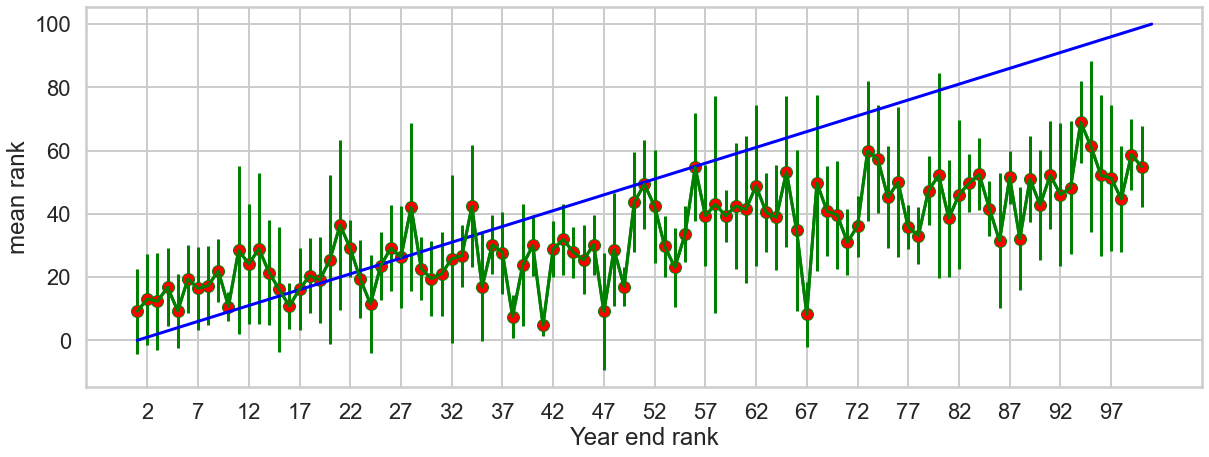

In [59]:
#your code here
fig,ax=plt.subplots(figsize=(20,7))
ax.plot(winners2020['ranking'],winners2020['rankmean'],color='green', marker='o',
     markerfacecolor='red')
ax.plot([0,100],[0,100],'b') # the 45 degree line
ax.errorbar(winners2020['ranking'],winners2020['rankmean'],winners2020['rankstd'],color='g')
ax.set_xticks(np.arange(1,100,5))
ax.set(xlabel='Year end rank',ylabel='mean rank')

##### Comment on the trend in this plot. 

In a paragraph, tell us how the general trend compares to the 45 degree line? What does this say about the predictive ability of the average rank for the final rank?

Average rank has some linear relation with the year end rank, but it does not follow the 45 degree line trend.

### 2.4 What features may be used to distinguish "winners" from "losers"?

[20 points]

#### 2.4.1 Creating the dataframe

Similar to the above, create a list `losers` of dictionaries, one for each song from the weekly lists that did not make it to the year end list. <br>
The dictionaries are identical to the dictionaries in the `winners` list, but we code the `ranking` as -1 for losers and set `winner` to 0. 

In [60]:
winlist=[e['title'] for e in winners]
all_list=[i for i in tdict.keys()]
losslist=list(set(all_list)-set(winlist))

In [61]:
winlist=[e['title'] for e in winners]
all_list=[i for i in tdict.keys()]
losslist=list(set(all_list)-set(winlist))
losers=[]
for loser in losslist:
  my_dict={}
  my_dict['ranking']=-1
  my_dict['rankmean']=tdict[loser.lower()]['ranks'][0]
  my_dict['rankstd']=tdict[loser.lower()]['ranks'][1]
  my_dict['title']=loser.lower()
  my_dict['weekson']=tdict[loser.lower()]['ranks'][2]
  my_dict['winner']=0
  losers.append(my_dict)

Use this list of dictionaries to create a dataframe `losers2020` with all the information gathered.


In [62]:
losers2020=pd.DataFrame(losers)
losers2020.head()

,ranking,rankmean,rankstd,title,weekson,winner
0,-1,72.5000,27.296215,that way,12,0
1,-1,67.4375,12.124195,what she wants tonight,16,0
2,-1,39.0000,NaN,escape from la,1,0
3,-1,95.0000,NaN,body language,1,0
4,-1,69.0000,NaN,sad shit,1,0


Next, concatenate the losers and winners into one dataframe `all2020`.

In [63]:
all2020=pd.concat([winners2020, losers2020])
all2020['ranking']=all2020['ranking'].astype('int')
all2020.head()

,ranking,rankmean,rankstd,title,weekson,winner
0,1,9.173077,13.423173,blinding lights,52,1
1,2,13.042553,14.394085,circles,47,1
2,3,12.361111,15.407705,the box,36,1
3,4,16.777778,12.341239,don't start now,45,1
4,5,9.257143,11.625939,rockstar,35,1


#### 2.4.2 Make a scatterplot matrix of these features, color coded by winners/losers

Use `sns.pairplot`. <br> Use all the numerical features(4), with the exception of `winner`, which you will use to give a different color to winners and losers. This will be a 4x4 matrix, with different colored dots for winners and losers off diagonal, and a 2 histograms on diagonal. The histogram shows the distribution of the one feature on the diagonal for both the winners and losers.




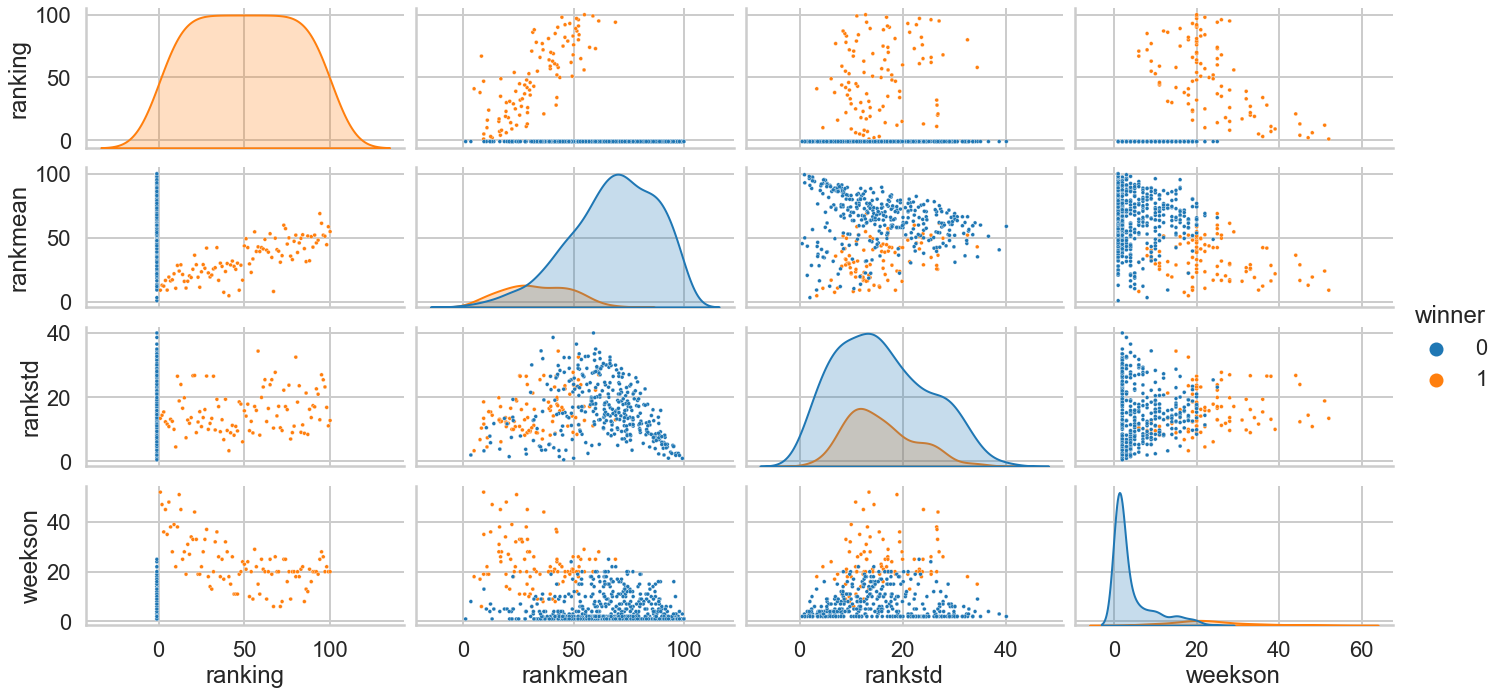

In [64]:
sns.pairplot(all2020,hue='winner',aspect=2,plot_kws={'s':15})

Which combination of "features" is most likely to separate winners from losers? 

It is this kind of observation in EDA that forms the basis for staring on predictive modelling! In a paragraph, identify one or two combinations of features that you think will best separate winners from losers. Why?

weeks_on and rank_mean seem to seperate the classes of winners and losers. weeks_on should be high and rank_mean should be low for a winner class, hence these two can separate the winner and loser class well.


Also, weeks_on and rank_std can separate the classes of winners ans losers.
 

 